# Homework #4  (Due date: 15th of December, 23:59)
- Download the Mall Customer Segmentation Data from the github repository below (or you can directly use the one attached in the assignment.)
- Use only 3 features (Age, Income and Spending Score) and run k-means algorithm. Determine/choose the optimum "k" value using the elbow method. Show your plot (error vs. k) and comment on plots. 
- Again with the same 3 features, scatter your data in a 3D plot. Coloring of samples should denote the determined categories (your optimum k). I.e. we should be able to distinguish the samples of k categories. Comment on optimum k value.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
!git clone https://github.com/UMBC-Data-Science/DATA602Datasets.git
mail_df = pd.read_csv("./DATA602Datasets/Mall_Customers.csv")
mail_df.head(3)

fatal: destination path 'DATA602Datasets' already exists and is not an empty directory.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
mail_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


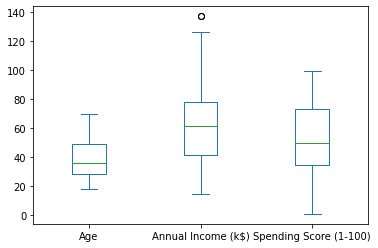

In [ ]:
#Plotting 3 features which is explained in the question for better understanding
mail_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].plot.box()

#Variable assign for easier implementetion
X = mail_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

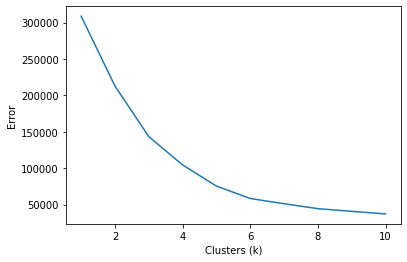

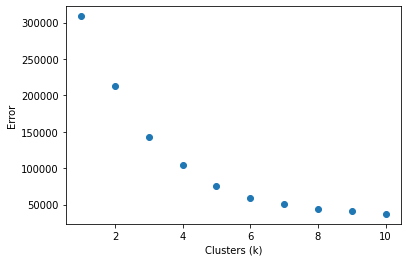

In [ ]:
#Elbow method
scores = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    scores.append( -k_means.score(X) )

#Plot elbow curve as line 
plt.plot(np.arange(1,11),scores)
plt.ylabel('Error')
plt.xlabel('Clusters (k)')
plt.show()

#Plot elbow curve as dots
plt.plot(np.arange(1,11),scores, 'o')
plt.ylabel('Error')
plt.xlabel('Clusters (k)')
plt.show()

In [ ]:
#Deciding k as 5 according to elbow method plots above
#For finding the proper k we look for the position in the plot where the score stops improving as much with an increase in k. 

#Implementing the optimum K_Mean Clustring which is k = 5 by analyzing the elbow methods Error vs Clusters (k) plot 
k_means_optimum = KMeans(n_clusters = 5)
y = k_means_optimum.fit_predict(X)
mail_df['cluster'] = y 

#Creating and deciding clusters 
mail_df1 = mail_df[mail_df.cluster==0]
mail_df2 = mail_df[mail_df.cluster==1]
mail_df3 = mail_df[mail_df.cluster==2]
mail_df4 = mail_df[mail_df.cluster==3]
mail_df5 = mail_df[mail_df.cluster==4]



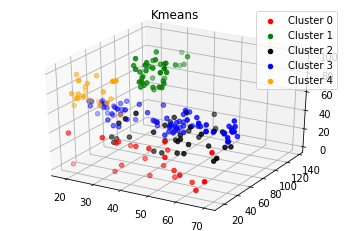

In [ ]:
#Creating 3D space
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)


# Data for three-dimensional scattered points
# All clusters colored differently and labeled with respectfull to their cluster
kplot.scatter3D(mail_df1['Age'], mail_df1['Annual Income (k$)'], mail_df1['Spending Score (1-100)'], c='red', label = 'Cluster 0')
kplot.scatter3D(mail_df2['Age'], mail_df2['Annual Income (k$)'], mail_df2['Spending Score (1-100)'],c ='green', label = 'Cluster 1')
kplot.scatter3D(mail_df3['Age'], mail_df3['Annual Income (k$)'], mail_df3['Spending Score (1-100)'], c='black', label = 'Cluster 2')
kplot.scatter3D(mail_df4['Age'], mail_df4['Annual Income (k$)'], mail_df4['Spending Score (1-100)'],c ='blue', label = 'Cluster 3')
kplot.scatter3D(mail_df5['Age'], mail_df5['Annual Income (k$)'], mail_df5['Spending Score (1-100)'], c='orange', label = 'Cluster 4')

plt.legend()
plt.title("Kmeans")
plt.show()